<a href="https://colab.research.google.com/github/harimarasini/harimarasini/blob/main/Second_take_home_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*__HARI MARASINI__*
*(MAR 03, 2024)*

__1. TASK 1__

__1.1 For this part, we will take this "chick_disease" dataset. It has different features like 'Age', 'Weight', 'Distress_calls' and 'Lesion_score' which will be used to predict  the  likelyhood of chicken disease. We have output called 'Diseases' which is a catagorical variable. So, we'll be using classifiers in this context__

__1.2 Comparing different classifiers using 'For' loop and saving best model__


In [60]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Importing data
data_classification = pd.read_csv('chick_disease.csv')

features_classification = data_classification.drop('Diseases', axis=1)
outputs_classification = data_classification['Diseases']


# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_classification, outputs_classification, test_size=0.2, random_state=42)

# Defining classifiers
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "GPC": GaussianProcessClassifier()
}

best_accuracy = 0.0
best_model = None
accuracies = {}
# Compare classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy  # Store accuracy of current classifier
    print(f'{name} Accuracy: {accuracy}')

    # Save the best model based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = clf

print(f'Best Model: {best_model} with Accuracy: {best_accuracy}')

# Saving our best model
import joblib
joblib.dump(best_model, 'best_model.pkl')

K-Nearest Neighbors Accuracy: 0.5
Support Vector Machine Accuracy: 0.39285714285714285
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
Gradient Boosting Accuracy: 1.0
Naive Bayes Accuracy: 1.0
AdaBoost Accuracy: 0.6785714285714286
Bagging Accuracy: 1.0
Extra Trees Accuracy: 1.0
GPC Accuracy: 0.5714285714285714
Best Model: DecisionTreeClassifier() with Accuracy: 1.0


['best_model.pkl']

__1.3 Plotting Accuracies of Classifiers__

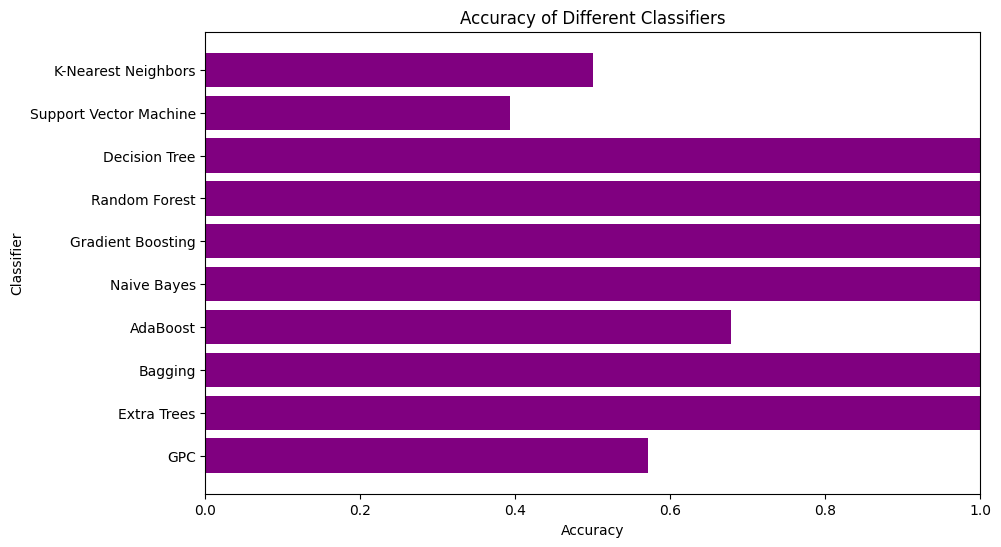

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='purple')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.title('Accuracy of Different Classifiers')
plt.xlim(0, 1)  # Limiting x-axis from 0 to 1
plt.gca().invert_yaxis()  # Inverting y-axis to have the highest accuracy on top
plt.show()

__1.4 Fine-tuning Hyperparameters for Best Model__

In [62]:
from sklearn.model_selection import GridSearchCV

# Define the model
dt_classifier = DecisionTreeClassifier()

# Define hyperparameters to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)

# Save the best model
joblib.dump(best_model, 'best_model_decisiontree_with_hyperparameters.pkl')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 1.0


['best_model_decisiontree_with_hyperparameters.pkl']

__2. TASK 2__

__2.1 For task 2, we will use the "chick_data_wo_disease" dataset. As we will be performing regression, I've removed "Diseases" column from previous dataset and created this new dataset__

__2.2 Comparing different regressors
 using 'For' loop and saving best model__

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import LabelEncoder
import time

# Load the regression dataset
data_regression = pd.read_csv('chick_data_wo_disease.csv')

# Split the dataset into features (X) and target variable (y)
X = data_regression.drop('Chicken weight', axis=1)
y = data_regression['Chicken weight']

# Label encoding for target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define regressors
regressors = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Bagging": BaggingRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Gaussian Process Regressor": GaussianProcessRegressor()
}

# Initializing variables to store best model and processing time
best_model = None
best_processing_time = float('inf')

# Initialize lists to store regressor names and processing times
regressor_names = []
processing_times = []

# Loop through regressors
for name, reg in regressors.items():
    start_time = time.time()  # Start time
    reg.fit(X_train, y_train_encoded)  # Fit the regressor
    end_time = time.time()  # End time
    processing_time = end_time - start_time  # Calculate processing time

    # Save regressor name and processing time
    regressor_names.append(name)
    processing_times.append(processing_time)

    # Print processing time of current regressor
    print(f"{name} Processing Time: {processing_time} seconds")


    # Update best model if processing time is lower
    if processing_time < best_processing_time:
        best_processing_time = processing_time
        best_model = reg

# Save the best model
import joblib
joblib.dump(best_model, 'best_regression_model.pkl')

# Report the best model and its processing time
print(f'Our Best Model is : {best_model} with Processing Time: {best_processing_time} seconds')

Random Forest Processing Time: 0.12282729148864746 seconds
Gradient Boosting Processing Time: 0.0542144775390625 seconds
AdaBoost Processing Time: 0.030709266662597656 seconds
Bagging Processing Time: 0.021729230880737305 seconds
Extra Trees Processing Time: 0.10405611991882324 seconds
Support Vector Machine Processing Time: 0.0033936500549316406 seconds
K-Nearest Neighbors Processing Time: 0.0016388893127441406 seconds
Decision Tree Processing Time: 0.002412557601928711 seconds
Linear Regression Processing Time: 0.0026352405548095703 seconds
Ridge Regression Processing Time: 0.002121448516845703 seconds
Lasso Regression Processing Time: 0.0019049644470214844 seconds
ElasticNet Regression Processing Time: 0.0022106170654296875 seconds
Gaussian Process Regressor Processing Time: 0.005267620086669922 seconds
Our Best Model is : KNeighborsRegressor() with Processing Time: 0.0016388893127441406 seconds


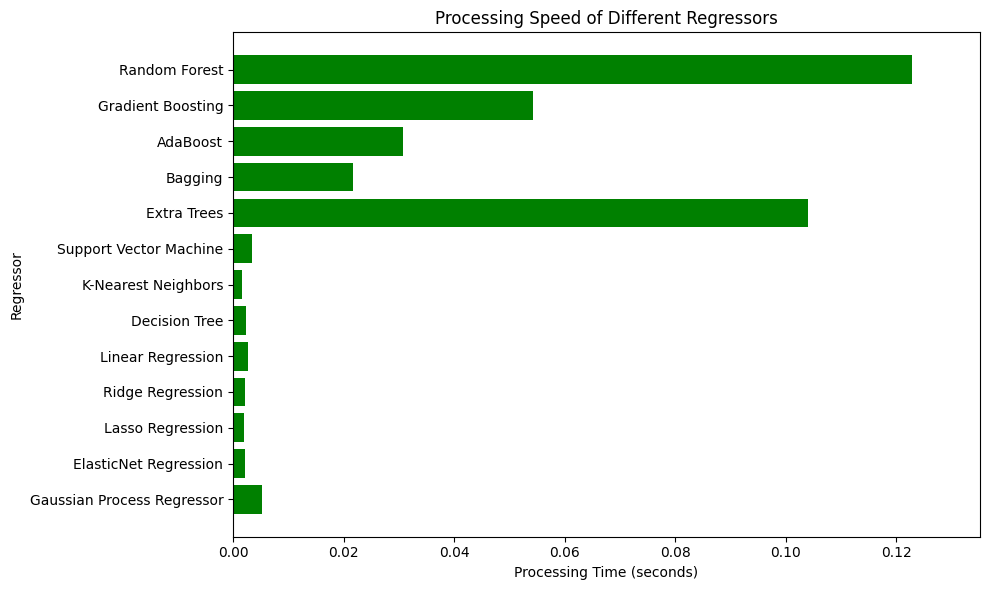

While running current job, our Best Model is: K-Nearest Neighbors with Processing Time: 0.0016388893127441406 seconds


In [64]:
# Plotting processing speed of each regressor with custom color
plt.figure(figsize=(10, 6))
plt.barh(regressor_names, processing_times, color='green')  # Change the color here
plt.xlabel('Processing Time (seconds)')
plt.ylabel('Regressor')
plt.title('Processing Speed of Different Regressors')
plt.xlim(0, max(processing_times) * 1.1)  # Set limit to 10% higher than the maximum processing time
plt.gca().invert_yaxis()  # Invert y-axis to have the highest processing time on top
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

# Find the index of the best processing time
best_index = processing_times.index(min(processing_times))

# Report the best model and its processing time
best_regressor_name = regressor_names[best_index]
best_processing_time = processing_times[best_index]
print(f'While running current job, our Best Model is: {best_regressor_name} with Processing Time: {best_processing_time} seconds')

__2.4 FIne tuning hyperparameters__

In [65]:
#We got KNeighborsRegressor() as our best model. So, we let's fine tune using KNN hyperparameters

knn_regressor = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Grid searching with cross-validation
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# Getting the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Printing our best parameters
print("Best Hyperparameters:", best_params)

# Saving our best model
import joblib
joblib.dump(best_model, 'best_knn_regressor_model.pkl')


Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}


['best_knn_regressor_model.pkl']

__3. TASK 3__

__3.1 For clustering, we will use the same "chick_data_wo_disease" dataset.__

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

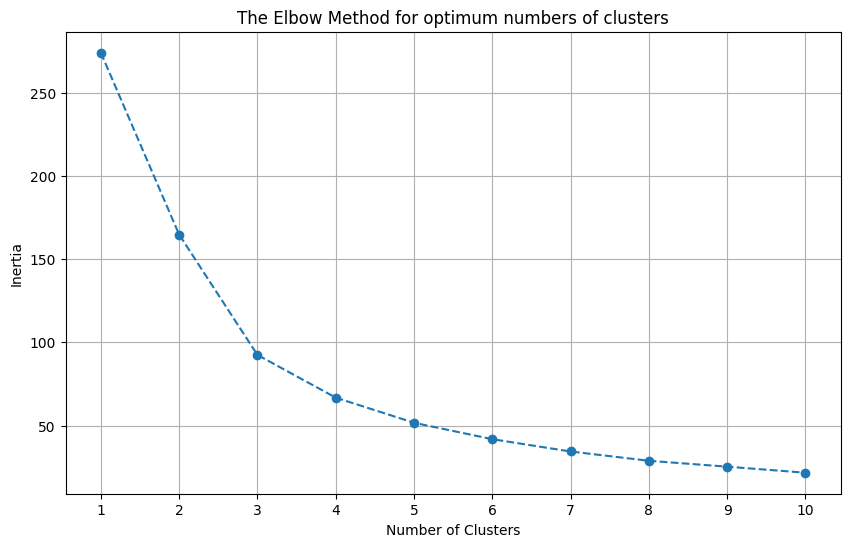

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('chick_data_wo_disease.csv')

# Selecting our two features for clustering
clu_features = data[['Age', 'Distress calls']]

# Standardize the features
scaler = StandardScaler()
clu_features_scaled = scaler.fit_transform(clu_features)

# Determine the optimal number of clusters using the Elbow method
inertia_values = []
for k in range(1, 11):  # Trying cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clu_features_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method for optimum numbers of clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

*We need the model with low inertia and low number of clusters. From the graph, we can see that decrease in inertia begins to slow between clusters 4-5. Though inertia seems more slower on moving forward, number of clusters also keep on increasing. So, the trade-off value of K for our model fits good for K = 4.*

__3.4 Visualizing clusters for two features namely 'Age' And 'Distress calls__

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


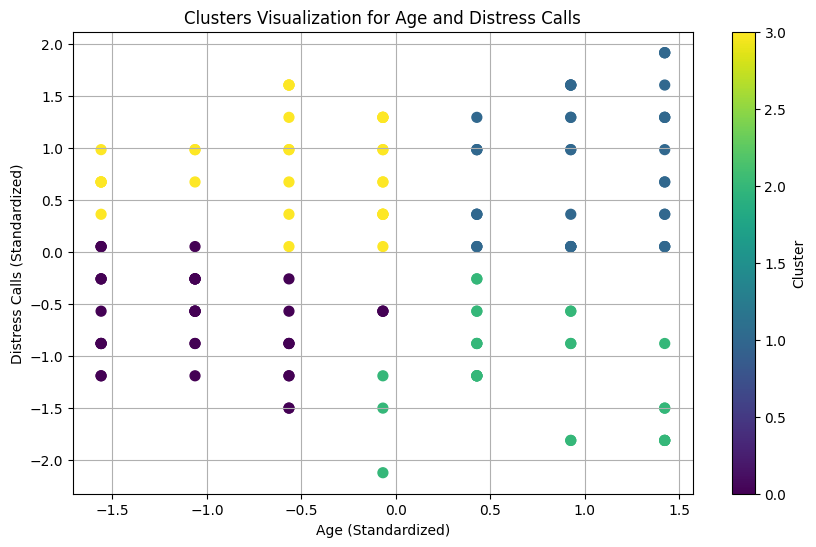

In [67]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(clu_features_scaled)
cluster_labels = kmeans.labels_

plt.figure(figsize=(10, 6))

plt.scatter(clu_features_scaled[:, 0], clu_features_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel('Age (Standardized)')
plt.ylabel('Distress Calls (Standardized)')
plt.title('Clusters Visualization for Age and Distress Calls')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

__TASK 4__

__4.1 For this ML Decomposition task, we will use this "bone_data_chicks" dataset. It has 10 features namely 'Age', 'Weight', 'Femur length', 'Femure_cort_thickness', 'Femur_peak_force', 'Tibia length', 'Tibia_cort_thickness', 'Tibia_peak_force', 'Keel_score' and 'BMC'.__

__4.2 Performing machine learning decomposition for  our dataset__

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer

bone_data = pd.read_csv('bone_data_chicks.csv')

#selecting features
features = bone_data[['Age', 'Weight', 'Femur_cort_thickness', 'Tibia_cort_thickness', 'Femur_peak_force', 'Tibia_peak_force', 'Keel_score', 'BMC']]

#normalization
transformer = Normalizer().fit(features)
features_norm = transformer.transform(features)

#running initial Principal Component Analysis (PCA)
pca = PCA()
features_pca = pca.fit_transform(features_norm)
names = [f"PC{i+1}" for i in range(features_pca.shape[1])]
features_pca = pd.DataFrame(features_pca, columns=names)

_Now, to get an idea on number of principal components, lets plot bar graph for % of explained variance ratio_

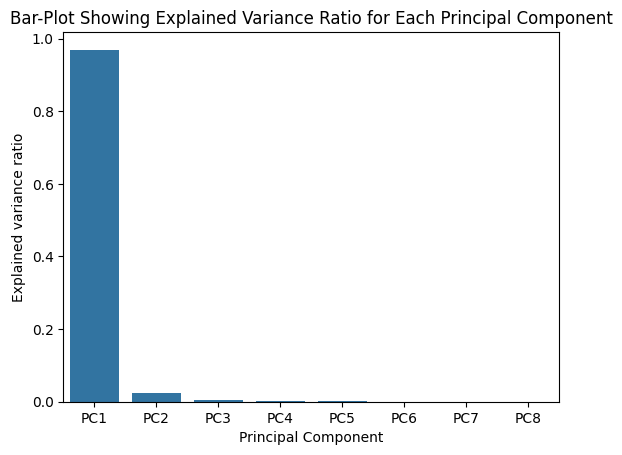

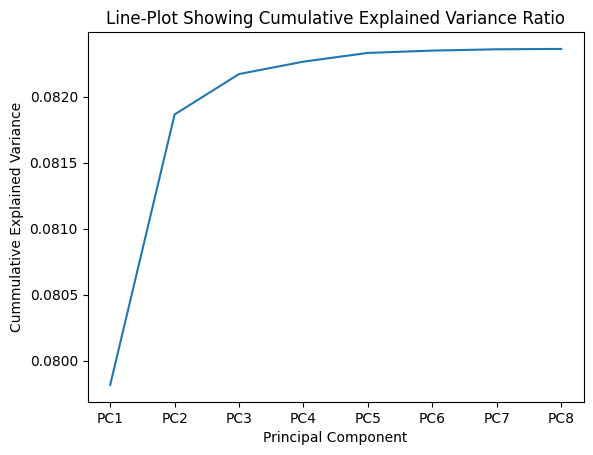

In [70]:
#barplot for percentage of explained variance ratio
evr = pca.explained_variance_ratio_
sns.barplot(x=np.array(names), y=evr)
plt.title('Bar-Plot Showing Explained Variance Ratio for Each Principal Component')
plt.xlabel("Principal Component")
plt.ylabel("Explained variance ratio")
plt.show()

#line-plot for cumulative explained variance ratio
evc = np.cumsum(pca.explained_variance_)
sns.lineplot(x=np.array(names), y=evc)
plt.title('Line-Plot Showing Cumulative Explained Variance Ratio')
plt.xlabel("Principal Component")
plt.ylabel("Cummulative Explained Variance")
plt.show()

__4.3 From above plots, it is clear that the first two components take up over 95% of the variance, so lets take no. of components as 2.__

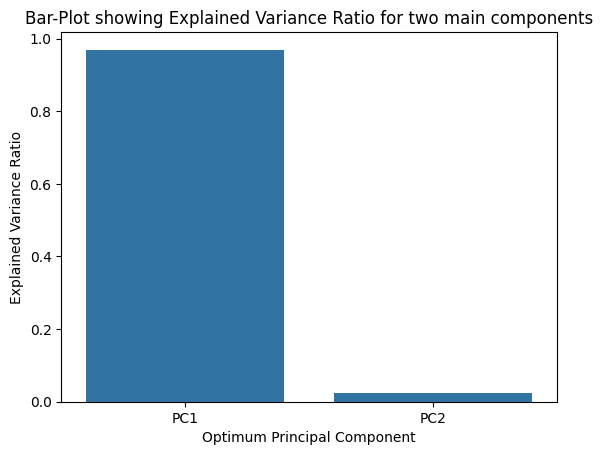

In [71]:
pca_new = PCA(n_components=2)

features_pca_new = pca_new.fit_transform(features_norm)
evr = pca_new.explained_variance_ratio_
sns.barplot(x=np.array(names[0:2]), y=evr)
plt.title('Bar-Plot showing Explained Variance Ratio for two main components')
plt.xlabel("Optimum Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

__4.4 We already found that the optimum no. of components is 2 for our model. Now, Lets use Machine Learning Regressor to compare our model 'without optimization' Vs 'with optimization' of number of principal components__

*When I ran this datset for best regeression model, I found KNeighborsRegressor as best model with shortest proceesing time. So, I will be using KNeighborsRegressor  with 'Femur_length' as feature to compare our original and PCA model __

MSE without PCA: 7.458446880833332
MSE with PCA: 5.522650122083337


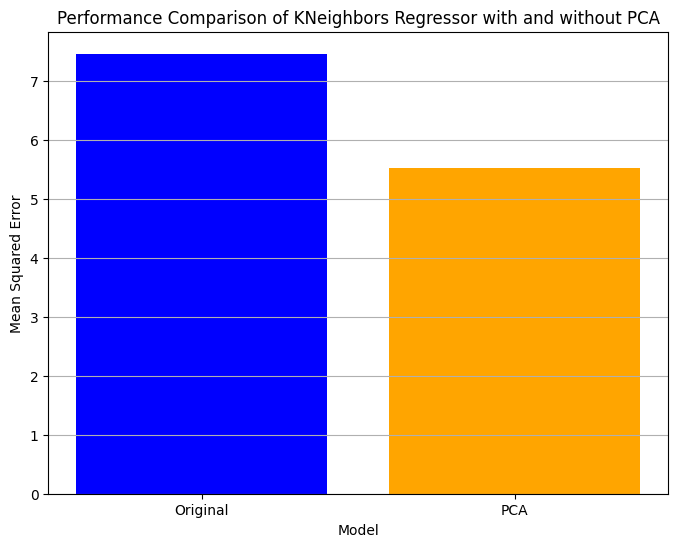

In [72]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_norm, bone_data['Femur_length'], test_size=0.2, random_state=42)

# Step 2: Train a Random Forest regressor on the original dataset and evaluate its performance
rf_original = RandomForestRegressor(random_state=42)
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)
mse_original = mean_squared_error(y_test, y_pred_original)

# Step 3: Train the same model on the dataset transformed using PCA with the optimal number of principal components
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(features_pca_new, bone_data['Femur_length'], test_size=0.2, random_state=42)
rf_pca = RandomForestRegressor(random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = rf_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)

# Step 4: Compare the performance metrics of both models
print(f'MSE without PCA: {mse_original}')
print(f'MSE with PCA: {mse_pca}')

# Step 5: Plot the performance difference
plt.figure(figsize=(8, 6))
plt.bar(['Original', 'PCA'], [mse_original, mse_pca], color=['blue', 'orange'])
plt.title('Performance Comparison of KNeighbors Regressor with and without PCA')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.grid(axis='y')
plt.show()

*From above bar-plot, it is obvious that after using optimum number of components (as n_components=2), we have optimized our PCA model which is performing  better than our Original Model. We have less Mean Standard Error (MSE) in our new PCA model than our Original Model*

*__THANK YOU__*
